In [353]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
%matplotlib inline
sns.set_style('whitegrid')

In [354]:
df = pd.read_csv("train.csv")

Step 2: Cleaning the data

Cabin has the most NaN values. It has 687 valuese missing. 

In [355]:
isnull_info = df.isnull().sum()
isnull_info

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

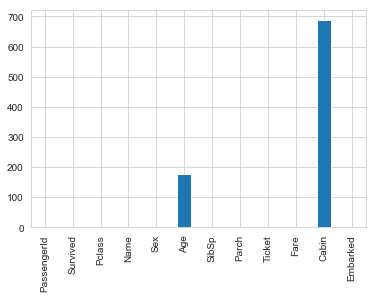

In [356]:
isnull_barchart = isnull_info.plot.bar(x = "Columns", y="Number of Nan")

In [357]:
df = df[df['Embarked'].notna()]
#Used the above code to get the row numbers, which is 61 and 829
df.shape

(889, 12)

In [358]:
values = {'Cabin': '¯\(ツ)/¯'}
df.fillna(value = values,inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯\(ツ)/¯,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,¯\(ツ)/¯,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,¯\(ツ)/¯,C


Step 3: Feature extraction

In [359]:
# There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called FamilyCount which will be the sum of those two columns.
df['FamilyCount'] = df['SibSp'] + df['Parch']

In [360]:
# Reverends have a special title in their name. Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.
df['IsReverend'] =(df['Name'].str.contains('Rev.')).astype(int)

In [361]:
dummy_data = pd.get_dummies(df['Embarked'])
dummy_data.rename(columns={'C': 'Embarked_C','S': 'Embarked_S','Q': 'Embarked_Q'}, inplace=True)
df = pd.concat([df,dummy_data], axis=1)

In [362]:
dummy_data_2 = pd.get_dummies(df['Sex'])
dummy_data_2
dummy_data_2.rename(columns={'female': 'Female','male':'Male'}, inplace=True)
df = pd.concat([df,dummy_data_2], axis=1)

In [363]:
dummy_data_3 = pd.get_dummies(df['Survived'])
dummy_data_3
dummy_data_3.rename(columns={0: 'D',1:'S'}, inplace=True)
df = pd.concat([df,dummy_data_3], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Female,Male,D,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,0,0,0,1,0,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,1,0,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,0,0,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,0,0,0,1,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,0,0,1,0,1,1,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,0,0,0,1,0,0,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,0,0,0,0,1,0,1,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,4,0,0,0,1,0,1,1,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,2,0,0,0,1,1,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,1,0,1,0,0,1,0,0,1


Step 4: Exploratory analysis
What was the survival rate overall?
Which gender fared the worst? What was their survival rate?
What was the survival rate for each Pclass?
Did any reverends survive? How many?
What is the survival rate for cabins marked ¯\(ツ)/¯
What is the survival rate for people whose Age is empty?
What is the survival rate for each port of embarkation?
What is the survival rate for children (under 12) in each Pclass?
Did the captain of the ship survive? Is he on the list?
Of all the people that died, who had the most expensive ticket? How much did it cost?
Does having family on the boat help or hurt your chances of survival?

In [364]:
# What was the survival rate overall? 
Survival_rate = round((df['Survived'].mean())*100, 2)
Survival_rate

38.25

In [365]:
# Which gender fared the worst? What was their survival rate? 
survived_men = round(np.mean(df['Survived'].where(df['Male'] ==1)*100),2)
survived_women = round(np.mean(df['Survived'].where(df['Female'] ==1)*100),2)

print("{}% of men survived and {}% of women survived".format(survived_men, survived_women))

18.89% of men survived and 74.04% of women survived


<BarContainer object of 2 artists>

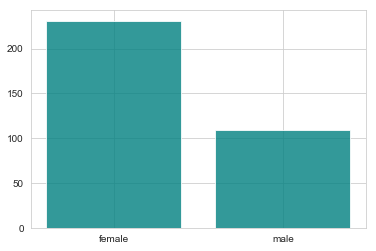

In [366]:
#TRY TO PUT BOTH THE CHARTS BESIDE EACH OTHER

survived_based_on_gender = df.groupby('Sex')['Survived'].sum()
survived_based_on_gender = pd.DataFrame(survived_based_on_gender)
plt.bar(survived_based_on_gender.index, survived_based_on_gender['Survived'], color = "teal", alpha = 0.8)

# died = df.groupby('Sex')['D'].sum()
# died = pd.DataFrame(died)
# plt.bar(died.index, died['D'])



In [367]:
# What was the survival rate for each Pclass? 

# df['Pclass'].unique()

pclass3_survived = round(np.mean(df['Survived'].where(df['Pclass'] ==3)*100),2)
pclass2_survived = round(np.mean(df['Survived'].where(df['Pclass'] ==2)*100),2)
pclass1_survived = round(np.mean(df['Survived'].where(df['Pclass'] ==1)*100),2)

The survival rate for each Pclass is following:
Pclass 1 = 62.62%
Pclass 2 = 47.28%
Pclass 3 = 24.24%


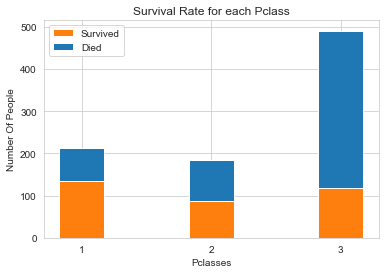

In [368]:
classes = df['Pclass'].unique()
classes.sort()

survival_based_onclass = []
died_based_onclass = []
total_on_each_class = []

for c in classes:
    survival_based_onclass.append(np.sum((df['Pclass'] == c) & (df['Survived'] == 1)))
#     died_based_onclass.append(np.sum((df['Pclass'] == c) & (df['Survived'] == 0)))
    total_on_each_class.append(np.sum((df['Pclass'] == c) & ((df['Survived'] == 1) |(df['Survived'] == 0) )))

total = plt.bar(classes, total_on_each_class, 0.35)
survived = plt.bar(classes, survival_based_onclass, 0.35)

plt.title('Survival Rate for each Pclass')
plt.xlabel('Pclasses')
plt.ylabel('Number Of People')
plt.legend((survived[0], total[0]), ('Survived', 'Died'))
plt.xticks(classes, ('1','2','3'));

print("""The survival rate for each Pclass is following:
Pclass 1 = {}%
Pclass 2 = {}%
Pclass 3 = {}%""".format(pclass1_survived,pclass2_survived,pclass3_survived))


In [369]:
# Did any reverends survive? How many?
reverend_survived = round(np.mean(df['Survived'].where(df['IsReverend'] ==1)*100),2)
# reverend_survived

print("{}% of reverend survived.".format(reverend_survived))

0.0% of reverend survived.


In [370]:
# What is the survival rate for cabins marked ¯\(ツ)/¯
empty_cabin_survived = round(np.mean(df['Survived'].where(df['Cabin'] =='¯\(ツ)/¯')*100),2)
empty_cabin_survived
print("{}% of people survived with cabin marked ¯\(ツ)/¯".format(empty_cabin_survived))

29.99% of people survived with cabin marked ¯\(ツ)/¯


In [371]:
# What is the survival rate for people whose Age is empty?
empty_age = round(np.mean(df['Survived'].where(df['Age'].isna())*100),2)
empty_age
print("{}% of people survived whose age was empty.".format(empty_age))

29.38% of people survived whose age was empty.


The survival rate for each port of embarkation is following:
Embarked_C = 55.36%
Embarked_Q = 38.96%
Embarked_S = 33.7%


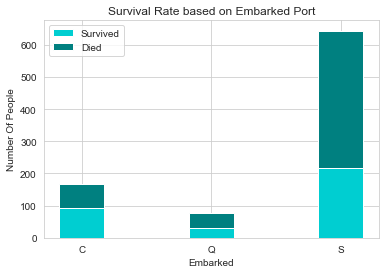

In [372]:
# What is the survival rate for each port of embarkation?
# df
embarked_C_survived = round(np.mean(df['Survived'].where(df['Embarked_C'] ==1)*100),2)
embarked_Q_survived = round(np.mean(df['Survived'].where(df['Embarked_Q'] ==1)*100),2)
embarked_S_survived = round(np.mean(df['Survived'].where(df['Embarked_S'] ==1)*100),2)

print("""The survival rate for each port of embarkation is following:
Embarked_C = {}%
Embarked_Q = {}%
Embarked_S = {}%""".format(embarked_C_survived,embarked_Q_survived,embarked_S_survived))

ports = df['Embarked'].unique()
ports.sort()

survival_based_ports = []
died_based_ports = []
total_from_each_ports = []

for p in ports:
    survival_based_ports.append(np.sum((df['Embarked'] == p) & (df['Survived'] == 1)))
#     died_based_onclass.append(np.sum((df['Embarked'] == p) & (df['Survived'] == 0)))
    total_from_each_ports.append(np.sum((df['Embarked'] == p) & ((df['Survived'] == 1) |(df['Survived'] == 0) )))

#Facts and numbers
# print(ports)
# print(survival_based_ports)
# print(total_from_each_ports)

total = plt.bar(ports, total_from_each_ports, 0.35, color ="teal")
survived = plt.bar(ports, survival_based_ports, 0.35, color="darkturquoise")

plt.title('Survival Rate based on Embarked Port')
plt.xlabel('Embarked')
plt.ylabel('Number Of People')
plt.legend((survived[0], total[0]), ('Survived', 'Died'))

In [373]:
# died = df.groupby('Embarked')['D'].sum()
# died = pd.DataFrame(died)
# plt.bar(died.index, died['D'])

# survived = df.groupby('Embarked')['Survived'].sum()
# survived
# survived = pd.DataFrame(survived)
# plt.bar(survived.index, survived['Survived'])

The survival rate for children (under 12) in each Pclass:
pclass_1_kids = 75.0%
pclass_2_kids = 100.0%
pclass_3_kids = 40.43%
 
NOTE: 100% of kids survived from PClass 2, therefore the bar chart is all orange


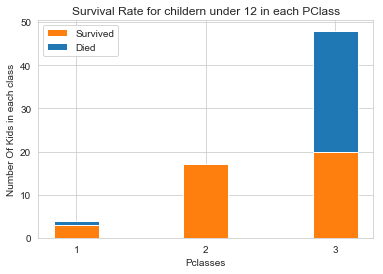

In [375]:
# What is the survival rate for children (under 12) in each Pclass?
pclass_1_kids_survived = round(np.mean(df['Survived'].where((df['Pclass'] ==1) & (df['Age'] < 12))*100),2)
pclass_2_kids_survived = round(np.mean(df['Survived'].where((df['Pclass'] ==2) & (df['Age'] < 12))*100),2)
pclass_3_kids_survived = round(np.mean(df['Survived'].where((df['Pclass'] ==3) & (df['Age'] < 12))*100),2)
classes = df['Age'].unique()
classes = df['Pclass'].unique()
classes.sort()

survival_based_onclass = []
died_based_onclass = []
total_on_each_class = []

for c in classes:
    survival_based_onclass.append(np.sum((df['Pclass'] == c) & (df['Survived'] == 1)&(df['Age']<=12)))
#     died_based_onclass.append(np.sum((df['Pclass'] == c) & (df['Survived'] == 0)))
    total_on_each_class.append(np.sum((df['Pclass'] == c) &(df['Age']<=12)&((df['Survived'] == 1) |(df['Survived'] == 0) )))

total = plt.bar(classes, total_on_each_class, 0.35)
survived = plt.bar(classes, survival_based_onclass, 0.35)

plt.title('Survival Rate for childern under 12 in each PClass')
plt.xlabel('Pclasses')
plt.ylabel('Number Of Kids in each class')
plt.legend((survived[0], total[0]), ('Survived', 'Died'))
plt.xticks(classes, ('1','2','3'));

print("""The survival rate for children (under 12) in each Pclass:
pclass_1_kids = {}%
pclass_2_kids = {}%
pclass_3_kids = {}%""".format(pclass_1_kids_survived,pclass_2_kids_survived,pclass_3_kids_survived))
print(" ")

print("NOTE: 100% of kids survived from PClass 2, therefore the bar chart is all orange")

In [376]:
# Did the captain of the ship survive? Is he on the list?
capt = df[df['Name'].str.contains('Capt.')]
capt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Female,Male,D,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,...,S,2,0,0,0,1,0,1,1,0


In [377]:
# Did the captain of the ship survive? Is he on the list?
print("The above chart gives us a name with the title: Capt. However, after researching about the captain for the ship, found out that given name is not in the list. ")

The above chart gives us a name with the title: Capt. However, after researching about the captain for the ship, found out that given name is not in the list. 


In [395]:
# Of all the people that died, who had the most expensive ticket? How much did it cost?
died_expensive_ticket = (df['Fare'].where((df['Survived']) ==0)).max()
check = df[(df['Fare'] == died_expensive_ticket)&(df['Survived'] == 0)]['Name']
check
print("Of all the people that died, Mr. Charles Alexander Fortune and Mr. Mark Fortune had the most expensive ticket. They paid ${} for his ticket.".format(died_expensive_ticket) )

#Prints white chart...work on it later

# survived_based_on_fare = df.groupby('Fare')['Survived'].sum()
# survived_based_on_fare = pd.DataFrame(survived_based_on_fare)
# plt.bar(survived_based_on_fare.index, survived_based_on_fare['Survived']);

# died_based_on_fare = df.groupby('Fare')['D'].sum()
# died_based_on_fare = pd.DataFrame(died_based_on_fare)
# plt.bar(died_based_on_fare.index, died_based_on_fare['D'])

# plt.title('Survival/Death distribution based on fare')
# plt.xlabel('Fare')
# plt.ylabel('Number Of People')
# plt.legend((survived_based_on_fare[0], died_based_on_fare[0]), ('Survived', 'Died'))


Of all the people that died, Mr. Charles Alexander Fortune and Mr. Mark Fortune had the most expensive ticket. They paid $263.0 for his ticket.


30.09% of people survived who had not family on board whereas 50.56% of people survived who had family
Having the family surely helped.


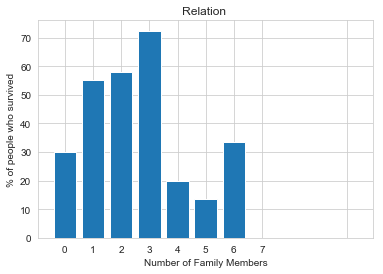

In [388]:
# Does having family on the boat help or hurt your chances of survival?
without_fam = round(np.mean(df['Survived'].where(df['FamilyCount'] == 0 )*100),2)
fam_jam = round(np.mean(df['Survived'].where(df['FamilyCount'] != 0 )*100),2)

print("{}% of people survived who had not family on board whereas {}% of people survived who had family".format(without_fam,fam_jam))
print("Having the family surely helped.")
familyCount = df['FamilyCount'].unique()
familyCount.sort()

survived_based_on_family = (df.groupby('FamilyCount')['Survived'].mean())*100
survived_based_on_family
survived_based_on_family = pd.DataFrame(survived_based_on_family)
plt.bar(survived_based_on_family.index, survived_based_on_family['Survived'])

plt.title('Relation ')
plt.xlabel('Number of Family Members')
plt.ylabel('% of people who survived')
plt.xticks(familyCount,('0','1','2','3','4','5','6','7'));